In [74]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import d2lzh_pytorch as d2l

In [75]:
def xy_plot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

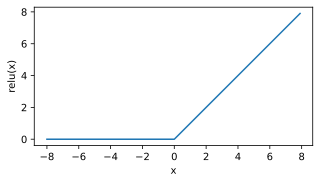

In [76]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xy_plot(x, y, 'relu')

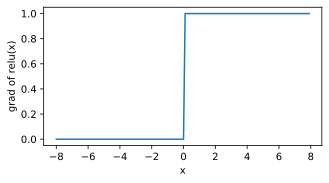

In [77]:
y.sum().backward()
xy_plot(x, x.grad, 'grad of relu')

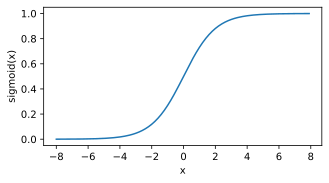

In [78]:
y = x.sigmoid()
xy_plot(x, y, 'sigmoid')

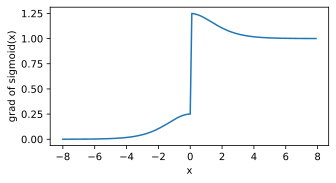

In [79]:
#x.grad.zero_()
y.sum().backward()
xy_plot(x, x.grad, 'grad of sigmoid')

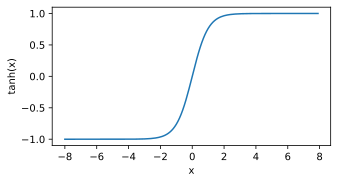

In [80]:
y = x.tanh()
xy_plot(x, y, 'tanh')

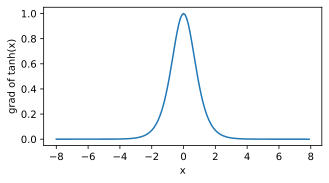

In [81]:
x.grad.zero_()
y.sum().backward()
xy_plot(x, x.grad, 'grad of tanh')

In [82]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, root='./Datasets/FashionMNIST')

In [83]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [84]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

In [85]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

In [89]:
loss = torch.nn.CrossEntropyLoss()

In [93]:
num_epochs, lr = 5, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              batch_size, params, lr)

epoch 1, loss 0.0012, train acc 0.890, test acc 0.865
epoch 2, loss 0.0011, train acc 0.893, test acc 0.868
epoch 3, loss 0.0011, train acc 0.896, test acc 0.864
epoch 4, loss 0.0011, train acc 0.899, test acc 0.863
epoch 5, loss 0.0011, train acc 0.900, test acc 0.870
